In [1]:
# imports/config
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

plt.rcParams['figure.figsize'] = [20, 12]

In [2]:
# plot as histogram and boxplot
def plot(data_set: pd.DataFrame, title: str ,out: str):
    isolated = data_set['browser_isolated'].to_numpy()
    unisolated = data_set['browser_unisolated'].to_numpy()
    
    assert len(isolated) == len(unisolated)
    data_len = len(isolated)

    # throw away outlier (the lower and upper 5%)
    ten_perc = int(data_len * 0.05)

    isolated.sort()
    isolated = isolated[ten_perc:-ten_perc]
    len_isolated = len(isolated)
    isolated_min = isolated.min()
    isolated_max = isolated.max()

    unisolated.sort()
    unisolated = unisolated[ten_perc:-ten_perc]
    len_unisolated = len(unisolated)
    unisolated_min = unisolated.min()
    unisolated_max = unisolated.max()

    min = np.array([isolated_min, unisolated_min]).min()
    max = np.array([isolated_max, unisolated_max]).max()

    assert len_isolated == len_unisolated

    bins = np.arange(round(min, 2) - 0.1, round(max, 2) + 0.2, step=0.005)

    # check for mircoseconds (step 0.1)
    ticks = np.arange(round(min, 0) - 0.1, round(max, 0) + 0.2, step=0.1)

    # plot as histogram
    plt.hist(x=isolated, color='blue' , alpha=1, rwidth=0.6 , bins=bins )
    plt.hist(x=unisolated, color='red', alpha=1, rwidth=0.6 , bins=bins )

    handles = [Rectangle((0,0),1,1, color=c,ec="k") for c in ["blue", "red"]]
    labels= ["Isolated","Unisolated"]
    plt.legend(handles, labels)

    plt.grid(axis='y', alpha=0.5)
    plt.title(f'Timestamp samples (target: 100ms) - {title}')
    plt.ylabel('Number of Occurrences')
    plt.xlabel('Distance to last Timestamp (ms)')
    plt.xticks(ticks, fontsize=14)
    plt.tight_layout()
    plt.savefig(out, bbox_inches="tight", pad_inches=0.3)
    plt.show()

# plot boxplot
def boxplot(data_set: pd.DataFrame,out:str):
    
    colums = data_set.columns.to_list()
    ax = data_set[colums[0:8]].plot(
        kind='box', title='boxplot', showmeans=True, showfliers=False)

    ax.tick_params(axis='x', rotation=30 ,labelsize=14)
    plt.setp(ax.get_xticklabels(), horizontalalignment='right')
    plt.tight_layout()
    plt.title(f"Browser timestamp precision (target: 100ms)", fontsize=18)
    plt.ylabel("Difference in sec", fontsize=18)
    plt.xlabel("Datapoints", fontsize=18)
    plt.tight_layout()
    plt.savefig(out ,bbox_inches="tight", pad_inches=0.3,)
    plt.show()

In [ ]:
# plot tor data as histogram
def plot_tor(data_set, title: str, out):
    unisolated = data_set['browser_unisolated'].to_numpy()[10:]

    unisolated.sort()
    unisolated = unisolated[10:-25]
    unisolated_min = unisolated.min()
    unisolated_max = unisolated.max()

    min = np.array([ unisolated_min]).min()
    max = np.array([ unisolated_max]).max()

    bins = np.arange(round(min, 2) - 5 , round(max, 2) + 5, step=0.1)
    
    ticks = np.arange(round(min, 2) - 5, round(max, 2) + 5, step=2)

    # plot as histogram
    plt.hist(x=unisolated, color='red', alpha=1, rwidth=0.6 , bins=bins )

    plt.grid(axis='y', alpha=0.5)
    plt.title(f'Timestamp samples (target: 100ms) - ${title}')
    plt.ylabel('Number of Occurrences')
    plt.xlabel('Distance to last Timestamp (ms)')
    plt.xticks(ticks, fontsize=14)
    plt.tight_layout()
    plt.savefig(out, bbox_inches="tight", pad_inches=0.3,)
    plt.show()

def boxplot_tor(data_set: pd.DataFrame, out:str):
    colums = data_set.columns.to_list()
    # print(data_set[colums[4:8]])
    ax = data_set[colums[4:8]].plot(
        kind='box', title='boxplot', showmeans=True, showfliers=False)

    ax.tick_params(axis='x', labelsize=14)
    plt.setp(ax.get_xticklabels(), horizontalalignment='right')
    plt.tight_layout()
    plt.title(f"Browser timestamp precision (target: 100ms)", fontsize=18)
    plt.ylabel("Distance to last Timestamp (ms)", fontsize=18)
    plt.xlabel("Datapoints", fontsize=18)
    plt.tight_layout()
    plt.savefig(out, bbox_inches="tight", pad_inches=0.3,)
    plt.show()

In [ ]:
# plot firefox configed as histogram and boxplot
def plot_firefox_configed(data_set: pd.DataFrame, data_set_configed: pd.DataFrame, out: str):

    isolated = data_set['browser_isolated'].to_numpy()
    unisolated = data_set['browser_unisolated'].to_numpy()

    isolated_resist = data_set_configed['isolated_resist'].to_numpy()
    unisolated_resist = data_set_configed['unisolated_resist'].to_numpy()
    
    assert len(isolated_resist) == len(unisolated_resist)
    data_len = len(isolated_resist)

    # throw away outlier (the lower and upper 5%)
    ten_perc = int(data_len * 0.05)
#
    isolated.sort()
    isolated = isolated[ten_perc:-ten_perc]
    len_isolated = len(isolated)
    isolated_min = isolated.min()
    isolated_max = isolated.max()
#
    unisolated.sort()
    unisolated = unisolated[ten_perc:-ten_perc]
    len_unisolated = len(unisolated)
    unisolated_min = unisolated.min()
    unisolated_max = unisolated.max()
#
    isolated_resist.sort()
    isolated_resist = isolated_resist[ten_perc:-ten_perc]
    len_isolated_resist = len(isolated_resist)
    isolated_resist_min = isolated_resist.min()
    isolated_resist_max = isolated_resist.max()
#
    unisolated_resist.sort()
    unisolated_resist = unisolated_resist[ten_perc:-ten_perc]
    len_unisolated_resist = len(unisolated_resist)
    unisolated_resist_min = unisolated_resist.min()
    unisolated_resist_max = unisolated_resist.max()

    

    min = np.array([isolated_min, unisolated_min, isolated_resist_min, unisolated_resist_min]).min()
    max = np.array([isolated_max, unisolated_max, isolated_resist_max, unisolated_resist_max]).max()

    assert len_isolated == len_unisolated == len_isolated_resist == len_unisolated_resist

    bins = np.arange(round(min, 0) - 1, round(max, 2) + 1, step=0.1)

    #
    ticks = np.arange(round(min, 0) - 1 , round(max, 0) + 1, step=1)

    # plot as histogram
    plt.hist(x=isolated, color='green' , alpha=0.6, rwidth=0.5 , bins=bins, label="Isolated")
    plt.hist(x=unisolated, color='yellow', alpha=0.6, rwidth=0.5 , bins=bins, label="Unisolated")
    plt.hist(x=isolated_resist, color='blue' , alpha=0.6, rwidth=3 , bins=bins, label="Isolated resistFingerprinting")
    plt.hist(x=unisolated_resist, color='red', alpha=0.6, rwidth=1 , bins=bins,label="Unisolated resistFingerprinting")

    plt.grid(axis='y', alpha=0.5)
    plt.title('Timestamp samples (target: 100ms)')
    plt.ylabel('Number of Occurrences')
    plt.xlabel('Distance to last Timestamp (ms)')
    #plt.xticks(rotation=60)
    plt.xticks(ticks, fontsize=14)
    plt.tight_layout()
    plt.legend()
    plt.savefig(out, bbox_inches="tight", pad_inches=0.3)
    plt.show()

# plot boxplot
def boxplot_firefox_configed(data_set: pd.DataFrame,out:str):
    
    colums = data_set.columns.to_list()
    ax = data_set[colums[0:8]].plot(
        kind='box', title='boxplot', showmeans=True, showfliers=True)

    ax.tick_params(axis='x', rotation=30 ,labelsize=14)
    plt.setp(ax.get_xticklabels(), horizontalalignment='right')
    plt.tight_layout()
    plt.title(f"Browser timestamp precision (target: 100ms)", fontsize=18)
    plt.ylabel("Difference in sec", fontsize=18)
    plt.xlabel("Datapoints", fontsize=18)
    plt.tight_layout()
    plt.savefig(out ,bbox_inches="tight", pad_inches=0.3,)
    plt.show()

In [ ]:
# chrome
chrome = pd.read_csv("./chrome/complete.csv", skiprows=[1,2,3,4,5,6,7,8,9,10])
plot(chrome, "Chrome","./chrome/hist.jpg")
boxplot(chrome, "./chrome/box.jpg")

In [ ]:
# edge
edge = pd.read_csv("./edge/complete.csv", skiprows=[1,2,3,4,5,6,7,8,9,10])
plot(edge, "Edge","./edge/hist.jpg")
boxplot(edge, "./edge/box.jpg")

In [ ]:
# firefox
firefox = pd.read_csv("./firefox/complete.csv", skiprows=[1,2,3,4,5,6,7,8,9,10])
plot(firefox, "Firefox","./firefox/hist.jpg")
boxplot(firefox, "./firefox/box.jpg")

In [ ]:
# chromium
chromium = pd.read_csv("./chromium/complete.csv", skiprows=[1,2,3,4,5,6,7,8,9,10])
plot(chromium, "Chromium", "./chromium/hist.jpg")
boxplot(chromium, "./chromium/box.jpg")

In [ ]:
# tor
tor = pd.read_csv("./tor/complete.csv", skiprows=[1,2,3,4,5,6,7,8,9,10])
plot_tor(tor, "Tor", "./tor/hist.jpg")
boxplot_tor(tor, "./tor/box.jpg")

In [ ]:
# safari
safari = pd.read_csv("./safari/complete.csv", skiprows=[1,2,3,4,5,6,7,8,9,10])
plot(safari, "Safari", "./safari/hist.jpg")
boxplot(safari, "./safari/box.jpg")

In [ ]:
# firefox configed
firefox = pd.read_csv("./firefox/complete.csv", skiprows=[1,2,3,4,5,6,7,8,9,10])
firefox_config = pd.read_csv("./firefox_rf/complete.csv", skiprows=[1,2,3,4,5,6,7,8,9,10])
plot_firefox_configed(firefox,firefox_config, "./firefox_rf/hist.jpg")
boxplot_firefox_configed(firefox_config, "./firefox_rf/box.jpg")

In [ ]:
# safari2
safari = pd.read_csv("./safari2/complete.csv", skiprows=[1,2,3,4,5,6,7,8,9,10])
plot(safari, "Safari", "./safari2/hist.jpg")
boxplot(safari, "./safari2/box.jpg")

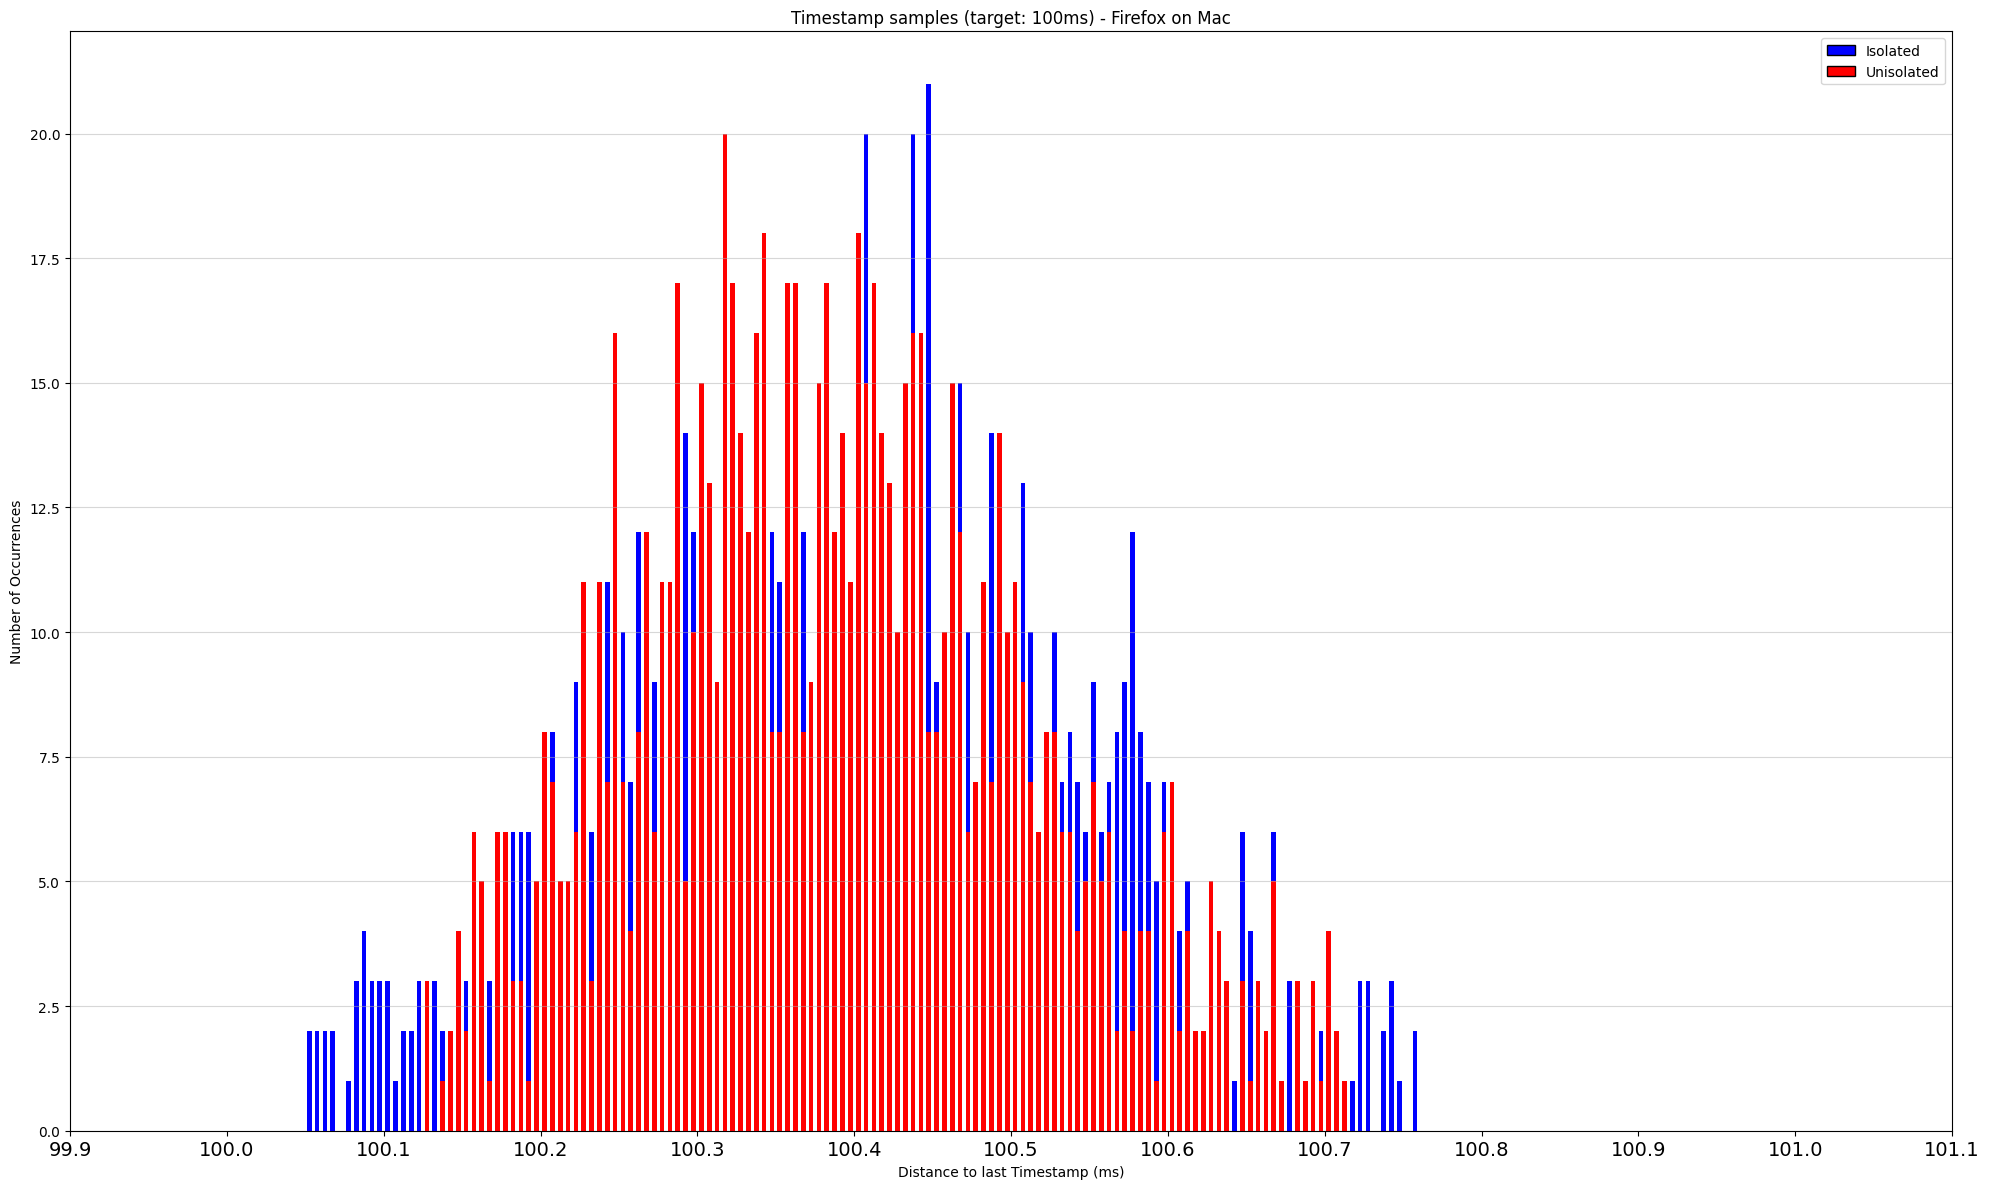

In [3]:
# firefox mac
safari = pd.read_csv("./firefox_mac/complete.csv", skiprows=[1,2,3,4,5,6,7,8,9])
plot(safari, "Firefox on Mac", "./firefox_mac/hist.jpg")